Important:
1. The goal is to implement some basic Photometric Stereo.
2. 


- The Photometric Stereo (PS): 3D-reconstruction of the scene from the 2D images
- Lambert’s Cosine Law:  Lambert's Law, describes the relationship between the intensity of light reflected off a surface and the angle of incidence of the light on that surface. 
- albedo: Albedo is a measure of the reflectivity of a surface. It is a dimensionless quantity ranging from 0 to 1, where 0 indicates a perfectly absorbing surface (no reflection), and 1 indicates a perfectly reflecting or completely diffusing surface (all incident light is reflected).
- Woodham’s approach: The key steps in Woodham's approach include:

Estimation of Albedo and Surface Normals:

For each pixel in the image, the Lambertian reflectance equation is used to create a set of linear equations.
The system of equations is then solved to estimate the albedo (reflectance) and surface normals for each pixel.
RANSAC (Random Sample Consensus):

To deal with outliers and noise in the data, Woodham's approach often employs RANSAC, a robust estimation algorithm.
RANSAC helps in obtaining a more reliable estimation of albedo and surface normals by iteratively fitting models to subsets of the data, identifying inliers, and refining the model.
Integration to Recover Depth:

Once albedo and surface normals are estimated, depth information can be recovered by integrating the normal field. This step involves solving a Poisson equation to obtain the depth map.

# 1 A bit of modelling

1. Write for a generic pixel, light source and normal, Lambert’s law in its simplest form.

<img src="./pic/Screenshot from 2023-12-11 11-25-26.png">

Where:
- Ii is the intensity of the pixel in image 
- si is the light vector corresponding to the direction of light in image 
- n is the surface normal at the corresponding pixel.

2. How is Lambert’s law modified to deal with self shadows.
To modify Lambert's Law to handle self-shadows, we can introduce a visibility term. 
So, the modified Lambert's Law with the visibility term is:

<img src='./pic/Screenshot from 2023-12-11 11-31-22.png'>



3. What about cast shadows? Comment on the difference between the two.
Lambert's Law itself does not explicitly handle cast shadows.   
Difference:

- Self-shadows pertain to a surface obstructing its own view of the light, affecting its own appearance.
- Cast shadows involve one object blocking light from reaching another object, creating shadows on the receiving surface.



4. Comment on the modelling limits of Lambert’s law.

- Lack of Specular Reflection
- No Sensitivity to View Direction
- Ignores Interreflections
- Uniform Albedo Assumption
- No Color Consideration
- Sensitivity to Light Source Direction
- Not Suitable for Transparent or Translucent Materials
- Limited in Handling Shadows



5. How can we obtain an estimate of albedo and normals in Woodham’s approach to Photometric Stereo. Write the equation.
In Woodham's approach to Photometric Stereo, the estimation of albedo and surface normals involves solving a set of linear equations derived from Lambert's Law. The basic equation for Lambertian reflection is modified to include the albedo and surface normals. For a single pixel in an image, the equation is:

<img src='pic/Screenshot from 2023-12-11 11-42-48.png'>    

Where:

- Ii is the intensity of the pixel in image 
- ρ is the albedo (reflectance) of the surface,
- si is the light vector corresponding to the direction of light in image 
- n is the surface normal at the pixel.


6. What should be done if one uses RANSAC. Please describe.

- Data Selection:

Randomly select a minimal set of data points (e.g., three pixels) to form a model. In the context of Photometric Stereo, this means choosing three pixel intensities, their corresponding light directions, and the corresponding surface normals.
- Model Fitting:

Use the selected data points to estimate the surface normals and albedo using the linear equation 

- Error Computation:

Compute the error for each data point by comparing the observed intensity with the intensity predicted by the estimated model. This could involve calculating the difference between the observed and predicted intensities.
- Outlier Detection:

Identify inliers and outliers based on a predefined threshold. Data points with errors below the threshold are considered inliers, while those with errors above the threshold are considered outliers.
- Repeat:

Repeat steps 1-4 for a predetermined number of iterations or until a sufficiently good model is found.
- Model Refinement:

Refine the estimated model using all the inliers identified during the RANSAC iterations. This could involve solving a least squares problem using all inliers.
- Final Estimation:

The final estimated model, which includes surface normals and albedo, is obtained after a successful RANSAC procedure.

# 6 Buddha Dataset

In [39]:

import numpy as np
# from "./DataAndCodeAssignment3/ps_utils.py" import ransac_3dvector, smooth_normal_field, display_surface, read_data_file
from DataAndCodeAssignment3.ps_utils import *

# Load the data for the Buddha dataset
I, mask, S = read_data_file("DataAndCodeAssignment3/Buddha.mat")
print(I.shape)
print(mask.shape)
print(S.shape)
# Get the size of the images and number of views
m, n, k = I.shape


(433, 650, 10)
(433, 650)
(10, 3)


In [57]:
albedo_matrix = np.zeros((mask.shape[0], mask.shape[1])) 
normals_matrix = np.zeros((mask.shape[0], mask.shape[1], 3)) 
for row in range(m):
    for col in range(n):
        if mask[row, col]:
            data = (I[row, col, :], S)
            modulated_normal, inliers, best_fit = ransac_3dvector(data,25.0, 
                                                                  max_data_tries=100, max_iters=1000, p=0.5, 
                                                                  det_threshold=1e-1, verbose=2)
            albedo_matrix[row, col] = np.linalg.norm(modulated_normal)
            normals_matrix[row, col, :] = modulated_normal / (albedo_matrix[row, col] + 0.0001) # 有时候rho会是0，然后就导致无穷大
            # print(normals_matrix[row, col, :])
            # print(albedo_matrix[row, col])

ransac_3dvector(): returning after 2 iterations.
ransac_3dvector(): returning after 1 iterations.
ransac_3dvector(): returning after 2 iterations.
ransac_3dvector(): returning after 1 iterations.
ransac_3dvector(): returning after 3 iterations.
ransac_3dvector(): returning after 2 iterations.
ransac_3dvector(): returning after 3 iterations.
ransac_3dvector(): returning after 2 iterations.
ransac_3dvector(): returning after 1 iterations.
ransac_3dvector(): returning after 2 iterations.
ransac_3dvector(): returning after 1 iterations.
ransac_3dvector(): returning after 3 iterations.
ransac_3dvector(): returning after 2 iterations.
ransac_3dvector(): returning after 2 iterations.
ransac_3dvector(): returning after 2 iterations.
ransac_3dvector(): returning after 2 iterations.
ransac_3dvector(): returning after 1 iterations.
ransac_3dvector(): returning after 1 iterations.
ransac_3dvector(): returning after 2 iterations.
ransac_3dvector(): returning after 1 iterations.
ransac_3dvector(): r

comments:
- p 越小， 

Text(0.5, 1.0, 'image of albedo')

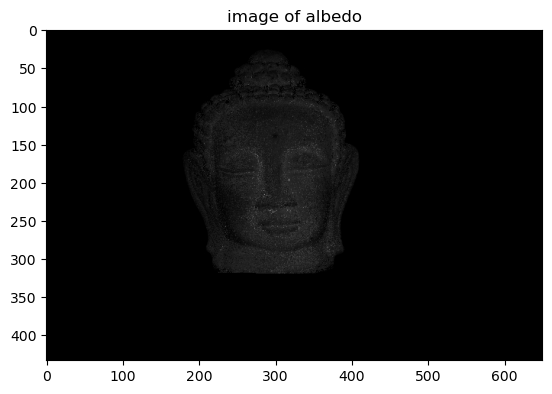

In [58]:
plt.imshow(albedo_matrix, cmap = 'gray')
plt.title('image of albedo')

comments:

-0.8368605197530139
-0.8379425961888538
-0.920566261687105
-0.5879911993475136
-0.7584264149320262
-0.8120158687488223
-0.6834086172349629
-0.7895690201254761
-0.8576494785644106
-0.8230323618667376
-0.8155334118185181
-0.4029536980360117
-0.7945784098941849
-0.8005286405396277
-0.8107677469653071
-0.8087750969889561
-0.7718391153096116
-0.7884236103224765
-0.8869293287189988
-0.45130828290413794
-0.8219965898945999
-0.7941961663313262
-0.8499516659209959
-0.7991984951682759
-0.3466007479972229
-0.4653922111892962
-0.8535070753907511
-0.8171010164157861
-0.8426696995939391
-0.8161414615465625
-0.8738202302442916
-0.8102302598849457
-0.8155133968118433
-0.8494197090710695
-0.719814053944704
-0.8191336088641008
-0.6386064110514845
-0.8782640767731239
-0.7869714483320309
-0.8215418671445598
-0.8837631364128898
-0.8688596396297852
-0.8963586024392027
-0.7347160860863049
-0.7801563102110026
-0.6437490330085988
-0.6696754812060446
-0.7315853445155698
-0.8070389551004301
-0.8301266567305785
-

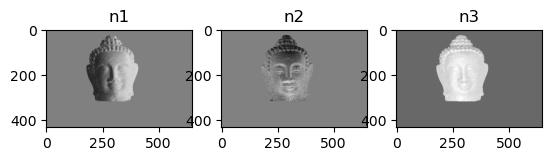

In [59]:
_,(ax1,ax2,ax3) = plt.subplots(1,3)
for i in normals_matrix[:,:,1].flatten():
    if i != 1 and i != 0:
        print(i)
ax1.imshow(normals_matrix[:,:,0], cmap='gray')
ax1.set_title('n1')
ax2.imshow(normals_matrix[:,:,1], cmap='gray')
ax2.set_title('n2')
ax3.imshow(normals_matrix[:,:,2], cmap='gray')
ax3.set_title('n3')
plt.show()

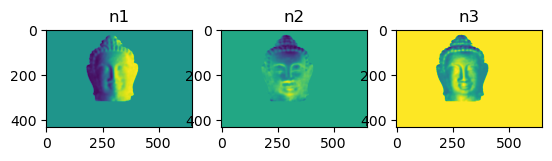

0.04716531487865321
0.05129668857791733
0.053595174829124355
-0.3184517159255738
-0.29639005759262493
-0.2578868976989715
-0.20626631202770376
-0.1470929325709474
-0.0880118625471025
-0.03632601030305352
0.003822857316509186
0.03327089604186613
0.04528259310913264
0.04965030264841298
0.049878071132798726
0.050196443920126066
0.05105938828264187
0.05243849405455395
0.053788026553853376
-0.40194767895600686
-0.38936708138833803
-0.3736837464820526
-0.35565563256218125
-0.3308236499534378
-0.3026121101428443
-0.2628796910637205
-0.2113896933253733
-0.1525980830737584
-0.09376496533951606
-0.04219562743367748
-0.002578904682486393
0.023987299641563563
0.03769356837281165
0.04329688601804289
0.044785187159625754
0.0453349042348369
0.04634584202684904
0.04824717783107148
0.05105049722183311
0.05524625373729391
0.06322911358925347
0.07458970351992336
0.08856530928570329
0.10363145026393113
0.11629035044731942
-0.47471259912892805
-0.45433060074908344
-0.4223393559525645
-0.39986074536846633
-

In [60]:
(n1, n2, n3) = smooth_normal_field(normals_matrix[:,:,0], normals_matrix[:,:,1], normals_matrix[:,:,2], mask, iters=100)
_,(ax1,ax2,ax3) = plt.subplots(1,3)
ax1.imshow(n1)
ax1.set_title('n1')
ax2.imshow(n2)
ax2.set_title('n2')
ax3.imshow(n3)
ax3.set_title('n3')
plt.show()
for i in n1.flatten():
    if i != 0.0 and i != np.nan:
        print(i)

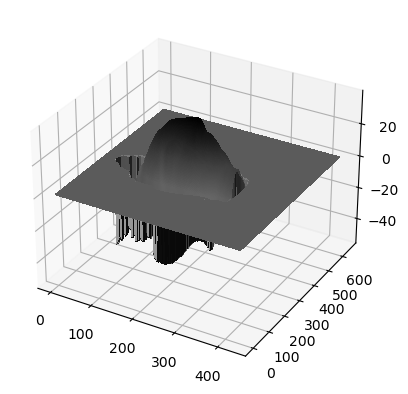

-53.78176002679765
-53.92711510429831
-54.07773922959936
-52.9057924477593
-52.49925803723117
-52.19437810185542
-51.99017282959186
-51.88906389404823
-51.887389360519435
-51.97323471756762
-52.12885662441037
-52.33734737015562
-52.5245365346778
-52.71288017209502
-52.93199139904913
-53.12398219730986
-53.28750983806147
-53.42184227380706
-53.53102424964158
-53.26141833339924
-52.71516283736625
-52.259309966622276
-51.865823851158254
-51.54028775188727
-51.20683182061963
-50.92703234972046
-50.72655554463326
-50.61695073598465
-50.59883503123919
-50.66254191810005
-50.790263949037914
-50.95892955480671
-51.136318007603
-51.313917323453246
-51.48968942654223
-51.64731294200947
-51.78162013720024
-51.89112760738217
-51.974966983489104
-52.02646700850947
-52.053493827454936
-52.07393046955264
-52.10533770082174
-52.16563804819942
-52.27704081952891
-52.83191084941028
-52.23789979374235
-51.807471349374495
-51.36159179535133
-50.9487594630031
-50.575377230659925
-50.24134334721286
-49.9325

In [61]:
z = unbiased_integrate(n1, n2, n3, mask)
display_surface(z)
for i in z.flatten():
    if i != 1:
        print(i)